# Tokenisation

There are mainly 3 types of tokenisation techniques used as mentioned below:
1. Word tokenisation
2. Sentence tokenisation
3. Tweet tokenisation
4. Custom tokenisation using regular expressions

### 1. Word Tokenisation

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

import requests
from nltk import FreqDist
from nltk.corpus import stopwords
import seaborn as sns
%matplotlib inline

### Dataset Description
Functional (F)
Functional Requirement (FR)
Availability (A)
Fault Tolerance (FT)
Legal (L)
Look & Feel (LF)
Maintainability (MN)
Operational (O)
Performance (PE)
Portability (PO)
Scalability (SC)
Security (SE)
Usability (US)
Non-Functional Requirement (NFR)

In [4]:
data = pd.read_csv('software_requirements_extended.csv')
data.head(20)

,Type,Requirement
0,PE,The system shall refresh the display every 60 ...
1,LF,The application shall match the color of the s...
2,US,If projected the data must be readable. On ...
3,A,The product shall be available during normal ...
4,US,If projected the data must be understandable...
5,SE,The product shall ensure that it can only be a...
6,US,The product shall be intuitive and self-explan...
7,PE,The product shall respond fast to keep up-to-d...
8,F,The system shall have a MDI form that allows f...
9,F,The system shall display Events in a vertical ...


In [5]:
data['Type'].value_counts()

Type
FR     312
F      209
NFR    110
US      63
O       58
SE      56
PE      54
LF      34
A       21
SC      21
MN      17
L       10
FT      10
PO       2
Name: count, dtype: int64

In [39]:
## Converting the read dataset in to a list of tuples, each tuple(row) contianing the message and it's label
data_set = []
for index,row in data.iterrows():
    data_set.append((row['Type'], row['Requirement']))

In [40]:
print(data_set[:5])

[('PE', 'The system shall refresh the display every 60 seconds.'), ('LF', 'The application shall match the color of the schema set forth by Department of Homeland Security'), ('US', ' If projected  the data must be readable.  On a 10x10 projection screen  90% of viewers must be able to read Event / Activity data from a viewing distance of 30'), ('A', ' The product shall be available during normal business hours. As long as the user has access to the client PC  the system will be available 99% of the time during the first six months of operation.'), ('US', ' If projected  the data must be understandable. On a 10x10 projection screen  90% of viewers must be able to determine that Events or Activities are occuring in current time from a viewing distance of 100')]


In [41]:
messages_set = []
for (label, message) in data_set:
    messages_set.append(message)

In [42]:
print(messages_set[:5])

['The system shall refresh the display every 60 seconds.', 'The application shall match the color of the schema set forth by Department of Homeland Security', ' If projected  the data must be readable.  On a 10x10 projection screen  90% of viewers must be able to read Event / Activity data from a viewing distance of 30', ' The product shall be available during normal business hours. As long as the user has access to the client PC  the system will be available 99% of the time during the first six months of operation.', ' If projected  the data must be understandable. On a 10x10 projection screen  90% of viewers must be able to determine that Events or Activities are occuring in current time from a viewing distance of 100']


In [43]:
tokens = [word_tokenize(word) for word in messages_set]
print(tokens)

[['The', 'system', 'shall', 'refresh', 'the', 'display', 'every', '60', 'seconds', '.'], ['The', 'application', 'shall', 'match', 'the', 'color', 'of', 'the', 'schema', 'set', 'forth', 'by', 'Department', 'of', 'Homeland', 'Security'], ['If', 'projected', 'the', 'data', 'must', 'be', 'readable', '.', 'On', 'a', '10x10', 'projection', 'screen', '90', '%', 'of', 'viewers', 'must', 'be', 'able', 'to', 'read', 'Event', '/', 'Activity', 'data', 'from', 'a', 'viewing', 'distance', 'of', '30'], ['The', 'product', 'shall', 'be', 'available', 'during', 'normal', 'business', 'hours', '.', 'As', 'long', 'as', 'the', 'user', 'has', 'access', 'to', 'the', 'client', 'PC', 'the', 'system', 'will', 'be', 'available', '99', '%', 'of', 'the', 'time', 'during', 'the', 'first', 'six', 'months', 'of', 'operation', '.'], ['If', 'projected', 'the', 'data', 'must', 'be', 'understandable', '.', 'On', 'a', '10x10', 'projection', 'screen', '90', '%', 'of', 'viewers', 'must', 'be', 'able', 'to', 'determine', 'tha

## Stop Words

In [44]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [45]:
def plot_word_frequency(words, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(x=labels, y=counts)
    return plot

In [54]:
words = []
for msg in tokens:
    for word in msg:
        words.append(word)

print(words)

['The', 'system', 'shall', 'refresh', 'the', 'display', 'every', '60', 'seconds', '.', 'The', 'application', 'shall', 'match', 'the', 'color', 'of', 'the', 'schema', 'set', 'forth', 'by', 'Department', 'of', 'Homeland', 'Security', 'If', 'projected', 'the', 'data', 'must', 'be', 'readable', '.', 'On', 'a', '10x10', 'projection', 'screen', '90', '%', 'of', 'viewers', 'must', 'be', 'able', 'to', 'read', 'Event', '/', 'Activity', 'data', 'from', 'a', 'viewing', 'distance', 'of', '30', 'The', 'product', 'shall', 'be', 'available', 'during', 'normal', 'business', 'hours', '.', 'As', 'long', 'as', 'the', 'user', 'has', 'access', 'to', 'the', 'client', 'PC', 'the', 'system', 'will', 'be', 'available', '99', '%', 'of', 'the', 'time', 'during', 'the', 'first', 'six', 'months', 'of', 'operation', '.', 'If', 'projected', 'the', 'data', 'must', 'be', 'understandable', '.', 'On', 'a', '10x10', 'projection', 'screen', '90', '%', 'of', 'viewers', 'must', 'be', 'able', 'to', 'determine', 'that', 'Even

<Axes: >

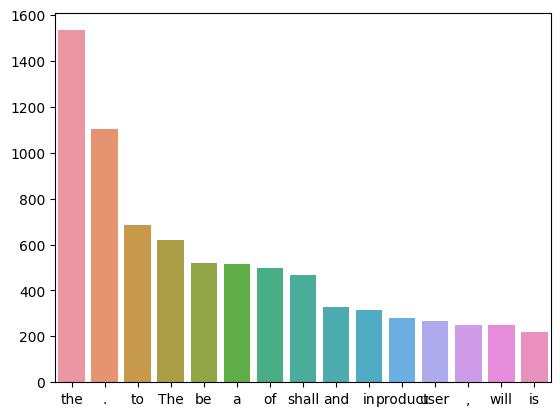

In [55]:
plot_word_frequency(words, 15)

## Lemmatization

In [59]:
### import necessary libraries
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/sarab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
wordnetlemmatizer = WordNetLemmatizer()
lemmatized_words = [wordnetlemmatizer.lemmatize(token) for token in words]
print(lemmatized_words)

['The', 'system', 'shall', 'refresh', 'the', 'display', 'every', '60', 'second', '.', 'The', 'application', 'shall', 'match', 'the', 'color', 'of', 'the', 'schema', 'set', 'forth', 'by', 'Department', 'of', 'Homeland', 'Security', 'If', 'projected', 'the', 'data', 'must', 'be', 'readable', '.', 'On', 'a', '10x10', 'projection', 'screen', '90', '%', 'of', 'viewer', 'must', 'be', 'able', 'to', 'read', 'Event', '/', 'Activity', 'data', 'from', 'a', 'viewing', 'distance', 'of', '30', 'The', 'product', 'shall', 'be', 'available', 'during', 'normal', 'business', 'hour', '.', 'As', 'long', 'a', 'the', 'user', 'ha', 'access', 'to', 'the', 'client', 'PC', 'the', 'system', 'will', 'be', 'available', '99', '%', 'of', 'the', 'time', 'during', 'the', 'first', 'six', 'month', 'of', 'operation', '.', 'If', 'projected', 'the', 'data', 'must', 'be', 'understandable', '.', 'On', 'a', '10x10', 'projection', 'screen', '90', '%', 'of', 'viewer', 'must', 'be', 'able', 'to', 'determine', 'that', 'Events', 'o

## Stemming

### Comparing Stemming & Lemmatization

In [66]:
### Comparing Stemming and Lemmatization
df = pd.DataFrame(data={'token': words, 'stemmed': stemmed, 'lemmatized': lemmatized_words})
df = df[['token', 'stemmed', 'lemmatized']]
df[(df.token != df.stemmed) | (df.token != df.lemmatized)]

,token,stemmed,lemmatized
0,The,the,The
6,every,everi,every
8,seconds,second,second
10,The,the,The
11,application,applic,application
...,...,...,...
22378,able,abl,able
22380,handle,handl,handle
22382,customers,custom,customer
22383,logged,log,logged


In [68]:
#### Why the lemmatization didn't worked properly ?

wordnet_lemmatizer = WordNetLemmatizer()
print(wordnet_lemmatizer.lemmatize("having", pos='n'))
print(wordnet_lemmatizer.lemmatize("having", pos='v'))

having
have


## POS Tagging - Lexicon and Rule Based Taggers

There are four main techniques used for POS tagging:

Lexicon-based

Rule-based

Probabilistic (or stochastic) techniques

Deep learning techniques

In [71]:
# Importing libraries
import nltk
import numpy as np
import pandas as pd
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import math

In [72]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to /Users/sarab/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [73]:
# loading the Treebank tagged sentences
wsj = list(nltk.corpus.treebank.tagged_sents())

In [74]:
# samples: Each sentence is a list of (word, pos) tuples
print(wsj[:3])

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')]]


In [75]:
# coverting list of sents to a list of (word, pos tag) tuples to make th other data preprocessing steps easier and convenient to process
tagged_words = [tup for sent in wsj for tup in sent]
print(len(tagged_words))
tagged_words[:10]

100676


[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT')]

### 2. Exploratory Analysis

We can explore the data to understand the POS tags. We can try to get the tags and words details.

1. How many unique tags are there in the corpus? 
2. Which is the most frequent tag in the corpus?
3. Which tag is most commonly assigned to the following words:
    - "bank"
    - "executive"

In [76]:
# number of unique POS tags in the corpus
tags = [pair[1] for pair in tagged_words]
unique_tags = set(tags)
len(unique_tags)

46

In [77]:
# Most frequent tag in the dataset
from collections import Counter
result_counts = Counter(tags)
result_counts

Counter({'NN': 13166,
         'IN': 9857,
         'NNP': 9410,
         'DT': 8165,
         '-NONE-': 6592,
         'NNS': 6047,
         'JJ': 5834,
         ',': 4886,
         '.': 3874,
         'CD': 3546,
         'VBD': 3043,
         'RB': 2822,
         'VB': 2554,
         'CC': 2265,
         'TO': 2179,
         'VBN': 2134,
         'VBZ': 2125,
         'PRP': 1716,
         'VBG': 1460,
         'VBP': 1321,
         'MD': 927,
         'POS': 824,
         'PRP$': 766,
         '$': 724,
         '``': 712,
         "''": 694,
         ':': 563,
         'WDT': 445,
         'JJR': 381,
         'NNPS': 244,
         'WP': 241,
         'RP': 216,
         'JJS': 182,
         'WRB': 178,
         'RBR': 136,
         '-RRB-': 126,
         '-LRB-': 120,
         'EX': 88,
         'RBS': 35,
         'PDT': 27,
         '#': 16,
         'WP$': 14,
         'LS': 13,
         'FW': 4,
         'UH': 3,
         'SYM': 1})

In [80]:
# Most commonly tag assigned to the word bank.
bank = [pair for pair in tagged_words if pair[0].lower() == 'bank']
print(bank)

[('bank', 'NN'), ('Bank', 'NNP'), ('bank', 'NN'), ('Bank', 'NNP'), ('bank', 'NN'), ('Bank', 'NNP'), ('bank', 'NN'), ('Bank', 'NNP'), ('bank', 'NN'), ('bank', 'NN'), ('bank', 'NN'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('bank', 'NN'), ('bank', 'NN'), ('bank', 'NN'), ('bank', 'NN'), ('bank', 'NN'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('bank', 'NN'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('bank', 'NN'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('bank', 'NN'), ('bank', 'NN'), ('Bank', 'NNP'), ('bank', 'NN'), ('bank', 'NN'), ('bank', 'NN'), ('Bank', 'NNP'), ('bank', 'NN'), ('bank', 'NN'), ('bank', 'NN'), ('bank', 'NN'), ('bank', 'NN'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('bank', 'NN'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('Bank', 'NNP'), ('bank', 'NN'), ('bank', 'NN'), ('Bank', 'NNP'), ('bank', 'NN'), ('bank', 'NN'), ('Bank', 'NNP'), ('bank',

In [81]:
# Words with the tag 'VBD' (verb, past tense) end with 'ed'
past_tense_verbs = [pair for pair in tagged_words if pair[1]=='VBD']
ed_verbs = [pair for pair in past_tense_verbs if pair[0].endswith('ed')]
print(len(ed_verbs) / len(past_tense_verbs))
ed_verbs[:20]

0.3881038448899113


[('reported', 'VBD'),
 ('stopped', 'VBD'),
 ('studied', 'VBD'),
 ('led', 'VBD'),
 ('worked', 'VBD'),
 ('explained', 'VBD'),
 ('imposed', 'VBD'),
 ('dumped', 'VBD'),
 ('poured', 'VBD'),
 ('mixed', 'VBD'),
 ('described', 'VBD'),
 ('ventilated', 'VBD'),
 ('contracted', 'VBD'),
 ('continued', 'VBD'),
 ('eased', 'VBD'),
 ('ended', 'VBD'),
 ('lengthened', 'VBD'),
 ('reached', 'VBD'),
 ('resigned', 'VBD'),
 ('approved', 'VBD')]

In [85]:
# Words with the tag 'VBG' end with 'ing'
participle_verbs = [pair for pair in tagged_words if pair[1]=='VBG']
ing_verbs = [pair for pair in participle_verbs if pair[0].endswith('ing')]
print(len(ing_verbs) / len(participle_verbs))
ing_verbs[:20]

0.9972602739726028


[('publishing', 'VBG'),
 ('causing', 'VBG'),
 ('using', 'VBG'),
 ('talking', 'VBG'),
 ('having', 'VBG'),
 ('making', 'VBG'),
 ('surviving', 'VBG'),
 ('including', 'VBG'),
 ('including', 'VBG'),
 ('according', 'VBG'),
 ('remaining', 'VBG'),
 ('according', 'VBG'),
 ('declining', 'VBG'),
 ('rising', 'VBG'),
 ('yielding', 'VBG'),
 ('waiving', 'VBG'),
 ('holding', 'VBG'),
 ('holding', 'VBG'),
 ('cutting', 'VBG'),
 ('manufacturing', 'VBG')]

## 3. Lexicon and Rule-Based Models for POS Tagging

Let's now see lexicon and rule-based models for POS tagging. We'll first split the corpus into training and test sets and then use built-in NLTK taggers. 

### 3.1 Splitting into Train and Test Sets

In [86]:
# splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(wsj, test_size=0.3)

print(len(train_set))
print(len(test_set))
print(train_set[:2])

2739
1175
[[('Economists', 'NNS'), ('consider', 'VBP'), ('that', 'DT'), ('a', 'DT'), ('sign', 'NN'), ('that', 'IN'), ('inflationary', 'JJ'), ('pressures', 'NNS'), ('are', 'VBP'), ('abating', 'VBG'), ('.', '.')], [('As', 'IN'), ('San', 'NNP'), ('Francisco', 'NNP'), ('digs', 'VBZ'), ('out', 'RP'), ('from', 'IN'), ('The', 'DT'), ('Pretty', 'NNP'), ('Big', 'NNP'), ('One', 'CD'), (',', ','), ('opponents', 'NNS'), ('say', 'VBP'), ('0', '-NONE-'), ('the', 'DT'), ('last', 'JJ'), ('thing', 'NN'), ('0', '-NONE-'), ('the', 'DT'), ('city', 'NN'), ('can', 'MD'), ('afford', 'VB'), ('*T*-1', '-NONE-'), ('is', 'VBZ'), ('an', 'DT'), ('expensive', 'JJ'), ('new', 'JJ'), ('stadium', 'NN'), ('.', '.')]]


### 3.2 Lexicon (Unigram) Tagger

In NLTK, the `UnigramTagger()`  can be used to train a model.

In [88]:
# Lexicon (or unigram tagger)
unigram_tagger = nltk.UnigramTagger(train_set)
unigram_tagger.evaluate(test_set)

/var/folders/vn/9wjp26gd3jq9s2fykd_nc4600000gn/T/ipykernel_11472/2670269465.py:3: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  unigram_tagger.evaluate(test_set)


0.8711269260465272

### 3.3. Rule-Based (Regular Expression) Tagger

In [90]:
# specify patterns for tagging
# example from the NLTK book
patterns = [
    (r'.*ing$', 'VBG'),              # gerund
    (r'.*ed$', 'VBD'),               # past tense
    (r'.*es$', 'VBZ'),               # 3rd singular present
    (r'.*ould$', 'MD'),              # modals
    (r'.*\'s$', 'NN$'),              # possessive nouns
    (r'.*s$', 'NNS'),                # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), # cardinal numbers
    (r'.*', 'NN')                    # nouns
]

In [91]:
regexp_tagger = nltk.RegexpTagger(patterns)
# help(regexp_tagger)

In [92]:
regexp_tagger.evaluate(test_set)

/var/folders/vn/9wjp26gd3jq9s2fykd_nc4600000gn/T/ipykernel_11472/792752471.py:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  regexp_tagger.evaluate(test_set)


0.22088690456208668

- provide tghe description of all the terminologies used
- A section for dataset
- Evaluation matrix should be mentioned
- Comparison b/w different papers shoudl be there
- Expolaination on Bert, TF_IDF
- comparison 